In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
pd.set_option('display.max_columns', None)

Setup Global Parameters

In [ ]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
TEST_SIZE = 0.2

LOAD **DATASET**

In [ ]:
data_df = pd.read_csv(r'./drive/MyDrive/Colab Notebooks/Datasets/breast_cancer_mod.csv')
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0
1,0,1,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,1,0,1,1,0
3,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,1,1,0
4,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,1,0


In [ ]:
data_df['target'].value_counts()

,count
target,
1,357
0,212


In [ ]:
features = data_df.drop('target', axis=1)
labels = data_df['target']
features.shape, labels.shape
labels

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,1
565,1
566,0
567,1


In [ ]:
data_df['total'] = data_df.sum(axis=1)
data_df.sort_values('total', inplace=True)
data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,total
0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,12
1,0,1,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,13
2,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,1,0,1,1,0,13
3,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,1,1,0,14
4,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,1,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,31
564,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,31
563,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,31
562,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,31


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=labels)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [ ]:
X_train['total'] = X_train.sum(axis=1)
X_train.sort_values('total', inplace = True)

In [ ]:
X_test['total'] = X_test.sum(axis = 1)

In [ ]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total
0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,1,1,1,0,0,0,0,1,1,0,0,1,1,12
1,0,1,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,13
2,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,1,0,1,1,13
7,0,1,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0,0,1,15
6,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,15


In [ ]:
tmp_df = data_df.groupby(['total', 'target']).agg({'target': 'count'})
tmp_df

,,target
total,target,
12,0,1
13,0,2
14,0,2
15,0,4
16,0,5
17,0,4
18,0,3
19,0,4
20,0,13


In [ ]:

tmp_df.columns = ['count']
tmp_df

,,count
total,target,
12,0,1
13,0,2
14,0,2
15,0,4
16,0,5
17,0,4
18,0,3
19,0,4
20,0,13


In [ ]:
accuracy =  {}

X_train['target'] = y_train


for b in range(X_train.shape[1]):
  X_train['pred'] = X_train['total'] >= b
  accuracy[b] = accuracy_score(X_train['pred'], X_train['target'])

In [ ]:
accuracy

{0: 0.6263736263736264,
 1: 0.6263736263736264,
 2: 0.6263736263736264,
 3: 0.6263736263736264,
 4: 0.6263736263736264,
 5: 0.6263736263736264,
 6: 0.6263736263736264,
 7: 0.6263736263736264,
 8: 0.6263736263736264,
 9: 0.6263736263736264,
 10: 0.6263736263736264,
 11: 0.6263736263736264,
 12: 0.6263736263736264,
 13: 0.6285714285714286,
 14: 0.6329670329670329,
 15: 0.6329670329670329,
 16: 0.6417582417582418,
 17: 0.6505494505494506,
 18: 0.6593406593406593,
 19: 0.6637362637362637,
 20: 0.6725274725274726,
 21: 0.6901098901098901,
 22: 0.7098901098901099,
 23: 0.734065934065934,
 24: 0.7692307692307693,
 25: 0.8021978021978022,
 26: 0.8307692307692308,
 27: 0.8505494505494505,
 28: 0.8483516483516483,
 29: 0.8241758241758241,
 30: 0.7472527472527473,
 31: 0.37362637362637363}

In [ ]:
df = pd.DataFrame(list(accuracy.items()), columns=['Index', 'Value'])
df = df.set_index('Index')
df.sort_values('Value', ascending=False).head(1)

,Value
Index,
27,0.850549


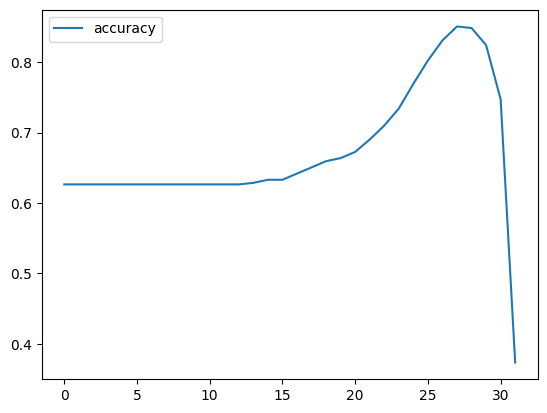

In [ ]:
ax = pd.DataFrame([accuracy], index= ['accuracy']).T.plot()